In [1]:
# Importing pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.cuda.get_device_name(0)

'GeForce 940MX'

In [2]:
torch.cuda.is_available()

True

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [5]:
# Importing the mnist dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

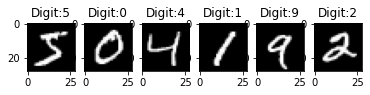

In [39]:
# Plot image from the pixel values
fig = plt.figure()

for i in range(6):
    ax = fig.add_subplot(1, 6, i+1) # this line adds sub-axes
    pixels = X.iloc[i].values.reshape((28, 28))
    ax.imshow(pixels, cmap='gray') # this line creates the image using the pre-defined sub axes
    ax.set_title("Digit:"+ y.iloc[i])

In [40]:
# Normalize the data
X = X / 255

In [55]:
X = X.values
y = y.astype(int)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [67]:
# Splitting into train and test 80-20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
# Converting arrays to tensors
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

In [83]:
# Creating the architecture of the ANN

class CNN_Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.f_connected1 = nn.Linear(in_features=32*4*4, out_features=1)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool1(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool2(x)
        x = torch.flatten(input=x, start_dim=x.size(0) , end_dim=-1)
        x = F.sigmoid(self.f_connected1(x))
        return x

In [84]:
# Instantiate the model
torch.manual_seed(1)
model = CNN_Model()

In [85]:
model.parameters

<bound method Module.parameters of CNN_Model(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (f_connected1): Linear(in_features=512, out_features=1, bias=True)
)>

In [86]:
# Backpropagation - Loss function, optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [96]:
# Hyperparameters
epochs = 20
final_losses = []
for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)
    if(i%10==0):
        print("In Epoch {}, the loss is: {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [16, 1, 5, 5], but got 3-dimensional input of size [56000, 28, 28] instead

In [88]:
X_train.shape

torch.Size([56000, 784])

In [94]:
X_train = torch.reshape(X_train, ( len(X_train), 28,28))

In [95]:
X_train.shape

torch.Size([56000, 28, 28])

In [4]:
from sklearn import metrics